In [10]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.image as plting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import pathlib

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [11]:
#Código para cargar el Dataset
data= read_csv("TFM_limpio 1.csv")


In [12]:
data.drop(['ID','Source','Start_Time','End_Time','Description','Street','City','County','State','Zipcode','Country','Timezone','Airport_Code','Weather_Timestamp','Wind_Direction','Weather_Condition','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'], axis=1, inplace=True)



In [13]:
data.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Humidity(%)', 'Pressure(in)', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Temperature(C)', 'Wind_Chill(C)', 'Visibility(km)', 'Distance(km)',
       'Wind_Speed(km/h)', 'Precipitation(mm)'],
      dtype='object')

----------------------------------------REGRESIÓN LINEAL---------------------------------------
mse:  0.22215567461168081
mae:  0.3386099761558872
rmse:  0.4713339311058358
medae:  0.2253727231815157
Matriz de Confusión:
[[    0   876     0     0]
 [    0 73611    17     0]
 [    0 14959     7     0]
 [    0  2237     0     0]]


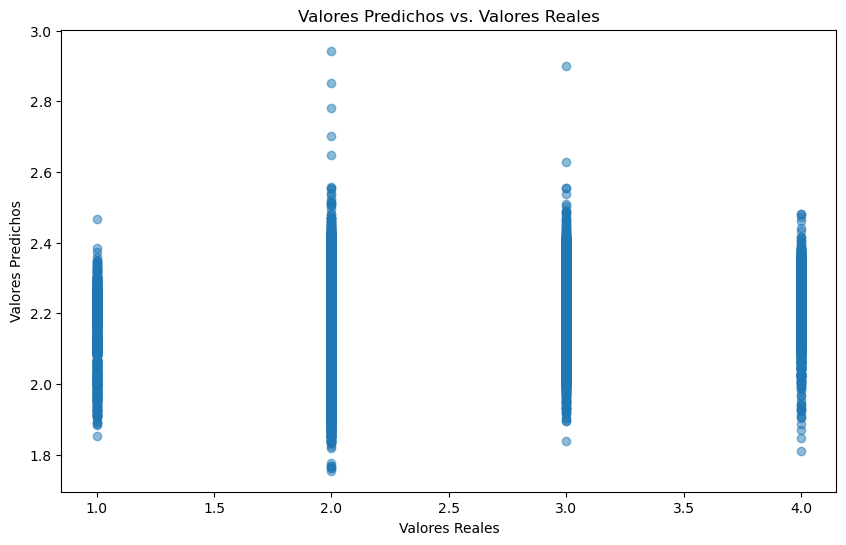

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix

# Supongamos que 'data' es tu DataFrame
# data = pd.read_csv("your_data.csv") # Asegúrate de cargar tu DataFrame aquí

# Extracción de características y etiquetas
Y = data["Severity"]
X = data.drop("Severity", axis=1)

# División de los datos en conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1, shuffle=True)

# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluación del modelo
mse = mean_squared_error(Y_validation, predictions)
mae = mean_absolute_error(Y_validation, predictions)
rmse = np.sqrt(mean_squared_error(Y_validation, predictions))
medae = np.median(np.abs(Y_validation - predictions))

print("----------------------------------------REGRESIÓN LINEAL---------------------------------------")
print("mse: ", mse)
print("mae: ", mae)
print("rmse: ", rmse)
print("medae: ", medae)

# Redondeo de las predicciones para obtener categorías discretas
predictions_rounded = np.round(predictions)

# Cálculo de la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions_rounded)

print("Matriz de Confusión:")
print(conf_matrix)

# Scatter plot de valores predichos vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(Y_validation, predictions, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Predichos vs. Valores Reales')
plt.show()

[[  171   340   215     1]
 [  131 49120   231    77]
 [  124   381   217     0]
 [    0  1394     0     2]]
              precision    recall  f1-score   support

           1       0.40      0.24      0.30       727
           2       0.96      0.99      0.97     49559
           3       0.33      0.30      0.31       722
           4       0.03      0.00      0.00      1396

    accuracy                           0.94     52404
   macro avg       0.43      0.38      0.40     52404
weighted avg       0.92      0.94      0.93     52404


Accuracy: 0.9447752079993894


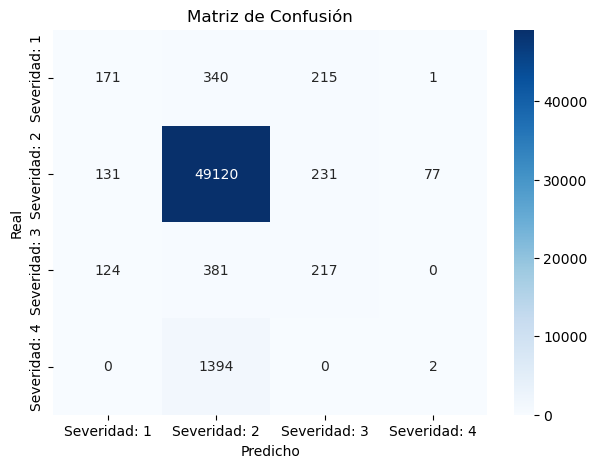

CSV generado exitosamente.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv('TFM_limpio 1.csv')

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes, año, día y hora
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# División del dataset en conjunto de entrenamiento (hasta julio de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()

# Seleccionar características y variable objetivo para entrenamiento y prueba
X_train = train_data[features]
Y_train = train_data[target]
X_validation = test_data[features]
Y_validation = test_data[target]

# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)

# Entrenar el modelo RandomForest
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# Realizar predicciones
predictions = model.predict(X_validation)

# Imprimir matriz de confusión
cm = confusion_matrix(Y_validation, predictions, labels=[1, 2, 3, 4])
print(cm)

# Imprimir informe de clasificación
print(classification_report(Y_validation, predictions))
print("\nAccuracy:", accuracy_score(Y_validation, predictions))

# Graficar matriz de confusión con etiquetas adecuadas
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Agregar predicciones al conjunto de prueba
test_data.loc[:, 'Predicted_Severity'] = predictions

# Seleccionar columnas necesarias para el nuevo DataFrame
columns = ['State', 'Hour', 'Day', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)', 'Predicted_Severity']

# Crear un nuevo DataFrame con las columnas seleccionadas
result_df = test_data[columns]

# Guardar el DataFrame en un archivo CSV
result_df.to_csv("predicted_severity_aug2022_jan2023.csv", index=False)

print("CSV generado exitosamente.")


In [ ]:
#-------------------------------------RANDOM FOREST REGRESSOR-----------------------------------------------------
#-------------------------------------------------------------------------------------------------------------
# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)

# Crear y entrenar el modelo de Random Forest Regressor
model = RandomForestRegressor(random_state=1)
model.fit(X_train, Y_train)

# Hacer predicciones
predictions = model.predict(X_validation)

# Evaluar el modelo
mse = mean_squared_error(Y_validation, predictions)
mae = mean_absolute_error(Y_validation, predictions)
rmse = np.sqrt(mse)
medae = np.median(np.abs(Y_validation - predictions))

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("MedAE: ", medae)

# Graficar matriz de confusión con etiquetas adecuadas
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

--------------------------------DECISION TREE CLASSIFIER---------------------------------------
[[  121   637   118     8]
 [  684 64714  6536  1851]
 [  136  5831  8462   302]
 [    5  1617   311   374]]
mse:  0.31956121124886866
mae:  0.23753911915120984
rmse:  0.5652974537788655
medae:  0.0
              precision    recall  f1-score   support

           1       0.13      0.14      0.13       884
           2       0.89      0.88      0.88     73785
           3       0.55      0.57      0.56     14731
           4       0.15      0.16      0.15      2307

    accuracy                           0.80     91707
   macro avg       0.43      0.44      0.43     91707
weighted avg       0.81      0.80      0.81     91707


Accuracy: 0.8033301710883575
[[  121   637   118     8]
 [  684 64714  6536  1851]
 [  136  5831  8462   302]
 [    5  1617   311   374]]


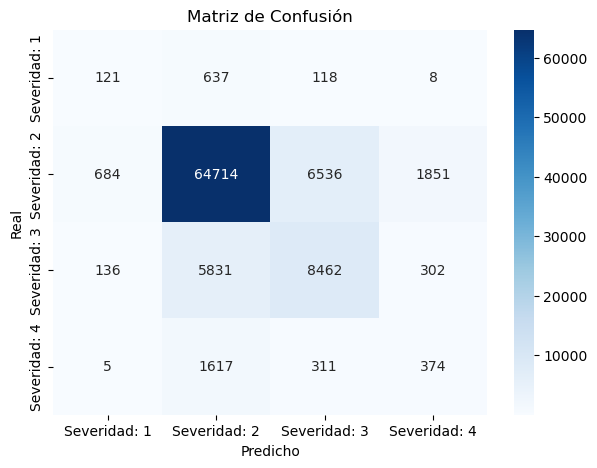

In [52]:
#-------------------------------------DECISION TREE CLASSIFIER-----------------------------------------------------
#-------------------------------------------------------------------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
print("--------------------------------DECISION TREE CLASSIFIER---------------------------------------")

predictions = model.predict(X_validation)
print(confusion_matrix(Y_validation, predictions))


#Evaluamos el Modelo con el MSE, el MAE, el RMSE y la MedAE
mse = mean_squared_error(Y_validation,predictions)
mae = mean_absolute_error(Y_validation,predictions)
rmse = np.sqrt(mean_squared_error(Y_validation,predictions))
medae = np.median(np.abs(Y_validation-predictions))

print("mse: ",mse)
print("mae: ",mae)
print("rmse: ",rmse)
print("medae: ",medae)
print(classification_report(Y_validation, predictions))
print("\nAccuracy:", accuracy_score(Y_validation, predictions))
# Imprimir matriz de confusión
cm = confusion_matrix(Y_validation, predictions, labels=[1, 2, 3, 4])
print(cm)

# Graficar matriz de confusión con etiquetas adecuadas
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

Class Weights:
{0: 1, 1: 0.11, 2: 1, 3: 1}

Accuracy: 0.84454839870457

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.03      0.05       884
           1       0.87      0.96      0.91     73785
           2       0.67      0.45      0.54     14731
           3       0.60      0.04      0.07      2307

    accuracy                           0.84     91707
   macro avg       0.66      0.37      0.39     91707
weighted avg       0.82      0.84      0.82     91707

[[   25   792    67     0]
 [   19 70726  3004    36]
 [    4  8093  6609    25]
 [    0  2060   156    91]]


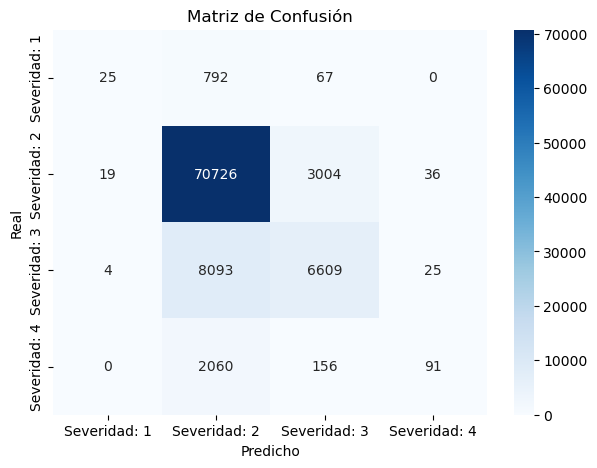

In [53]:
#-------------------------------------XGBOOST-----------------------------------------------------
#-------------------------------------------------------------------------------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir etiquetas a rango [0, n_classes-1]
Y = Y - 1

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)

# Definir pesos manuales para las clases
class_weights = {
    0: 1,    # Peso para severidad 1
    1: 0.11,    # Peso para severidad 2 (reducido)
    2: 1,    # Peso para severidad 3
    3: 1     # Peso para severidad 4
}

# Imprimir pesos de las clases
print("Class Weights:")
print(class_weights)

# Entrenar el modelo XGBoost
model = XGBClassifier()
model.fit(X_train, Y_train)

# Hacer predicciones
predictions = model.predict(X_validation)

# Evaluar el modelo
print("\nAccuracy:", accuracy_score(Y_validation, predictions))
print("\nClassification Report:")
print(classification_report(Y_validation, predictions))

# Imprimir matriz de confusión
cm = confusion_matrix(Y_validation, predictions, labels=[0, 1, 2, 3])
print(cm)

# Graficar matriz de confusión con etiquetas adecuadas
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


### XGBOOST CON AUTOBALANCEO

Class Weights:
{0: 117.63270698766883, 1: 1.2764370617451504, 2: 5.465541701907075, 3: 39.834658977928015}

Accuracy: 0.6774673689031372

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.01      0.01       727
           1       0.97      0.69      0.81     49559
           2       0.32      0.88      0.47       722
           3       0.04      0.43      0.07      1396

    accuracy                           0.68     52404
   macro avg       0.45      0.50      0.34     52404
weighted avg       0.93      0.68      0.77     52404

[[    5    24   689     9]
 [    3 34257   660 14639]
 [    3    68   634    17]
 [    0   787     3   606]]


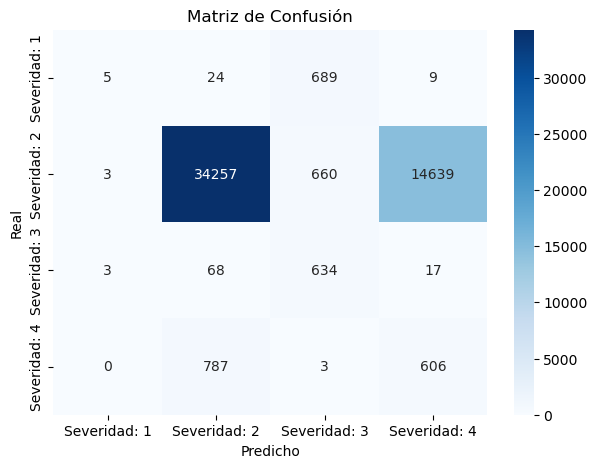

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('TFM_limpio 1.csv')

# Convertir la columna Severity a valores numéricos de 0 a 3
severity_mapping = {1: 0, 2: 1, 3: 2, 4: 3}
df['Severity'] = df['Severity'].map(severity_mapping)

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes, año, día y hora
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# División del dataset en conjunto de entrenamiento (hasta julio de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()

# Seleccionar características y variable objetivo para entrenamiento y prueba
X_train = train_data[features]
Y_train = train_data[target]
X_validation = test_data[features]
Y_validation = test_data[target]

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)

# Calcular pesos de clase inversamente proporcionales a su frecuencia
class_counts = np.bincount(Y_train)
class_weights = {i: len(Y_train) / class_counts[i] for i in range(len(class_counts))}

# Imprimir pesos de las clases
print("Class Weights:")
print(class_weights)

# Crear un array de pesos para cada muestra en el conjunto de entrenamiento
sample_weights = np.array([class_weights[class_label] for class_label in Y_train])

# Entrenar el modelo XGBoost con pesos de muestra
model = XGBClassifier()
model.fit(X_train, Y_train, sample_weight=sample_weights)

# Hacer predicciones
predictions = model.predict(X_validation)

# Evaluar el modelo
print("\nAccuracy:", accuracy_score(Y_validation, predictions))
print("\nClassification Report:")
print(classification_report(Y_validation, predictions))

# Imprimir matriz de confusión
cm = confusion_matrix(Y_validation, predictions, labels=[0, 1, 2, 3])
print(cm)

# Graficar matriz de confusión con etiquetas adecuadas
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


#### XGBOOST CON SMOTE

In [ ]:
#-------------------------------------XGBOOST CON SMOTE------------------------------------
#------------------------------------------------------------------------------------------

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Cargar el dataset
df = pd.read_csv("TFM_Limpio 1.csv")

# Convertir la columna Severity a valores numéricos de 0 a 3
severity_mapping = {1: 0, 2: 1, 3: 2, 4: 3}
df['Severity'] = df['Severity'].map(severity_mapping)

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes, año, día y hora
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# Dividir conjunto de entrenamiento (hasta agosto de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()

# Dividir conjunto de prueba en características y variable objetivo
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Inicializar el clasificador XGBoost con logloss para mejor manejo de clases desequilibradas
model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    random_state=42,
    eval_metric='mlogloss'
)

# Entrenar el modelo
model.fit(X_train_scaled, y_train_resampled)

# Predecir la severidad de los accidentes de agosto de 2022 a enero de 2023
predictions = model.predict(X_test_scaled)

# Calcular el score del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3])
print("Confusion Matrix:")
print(conf_matrix)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Agregar predicciones al conjunto de prueba
test_data.loc[:, 'Predicted_Severity'] = predictions + 1

# Seleccionar columnas necesarias para el nuevo DataFrame
columns = ['State', 'Hour', 'Day', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)', 'Predicted_Severity']

# Crear un nuevo DataFrame con las columnas seleccionadas
result_df = test_data[columns]

# Guardar el DataFrame en un archivo CSV
# result_df.to_csv("predicted_severity_aug2022_jan2023.csv", index=False)

# print("CSV generado exitosamente.")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Cargar el dataset
df = pd.read_csv("TFM_Limpio 1.csv")

# Convertir la columna Severity a valores numéricos de 0 a 3
severity_mapping = {1: 0, 2: 1, 3: 2, 4: 3}
df['Severity'] = df['Severity'].map(severity_mapping)

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes, año, día y hora
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# Dividir conjunto de entrenamiento (hasta agosto de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()

# Dividir conjunto de prueba en características y variable objetivo
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Inicializar el clasificador XGBoost con logloss para mejor manejo de clases desequilibradas
model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    random_state=42,
    eval_metric='mlogloss'
)

# Entrenar el modelo
model.fit(X_train_resampled, y_train_resampled)

# Predecir la severidad de los accidentes de agosto de 2022 a enero de 2023
predictions = model.predict(X_test)

# Calcular el score del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3])
print("Confusion Matrix:")
print(conf_matrix)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Agregar predicciones al conjunto de prueba
test_data.loc[:, 'Predicted_Severity'] = predictions + 1

# Seleccionar columnas necesarias para el nuevo DataFrame
columns = ['State', 'Hour', 'Day', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)', 'Predicted_Severity']

# Crear un nuevo DataFrame con las columnas seleccionadas
result_df = test_data[columns]

# Guardar el DataFrame en un archivo CSV
result_df.to_csv("predicted_severity_aug2022_jan2023.csv", index=False)

print("CSV generado exitosamente.")


Pesos de las clases manuales: {0: 8.0, 1: 0.5, 2: 3.0, 3: 6.0}
Accuracy: 0.9258071902908175
Confusion Matrix:
[[    0    27   700     0]
 [    1 47835   747   976]
 [    0    83   638     1]
 [    0  1349     4    43]]


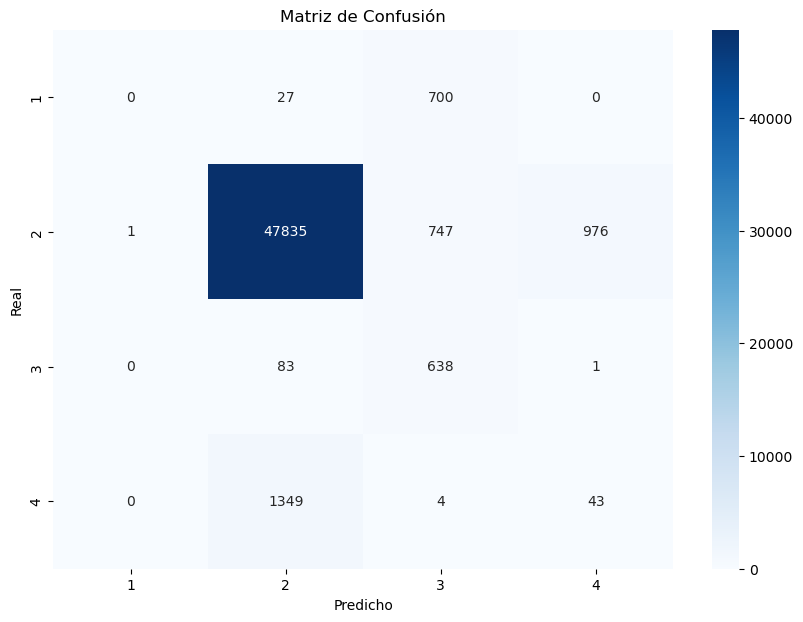

CSV generado exitosamente.


In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Cargar el dataset
df = pd.read_csv("TFM_Limpio 1.csv")

# Convertir la columna Severity a valores numéricos de 0 a 3
severity_mapping = {1: 0, 2: 1, 3: 2, 4: 3}
df['Severity'] = df['Severity'].map(severity_mapping)

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes, año, día y hora
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# Dividir conjunto de entrenamiento (hasta agosto de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()

# Dividir conjunto de prueba en características y variable objetivo
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir pesos manualmente
class_weights_manual = {
    0: 8.0,   # Peso para severidad 1
    1: 0.5,    # Peso para severidad 2 (reducido)
    2: 3.0,    # Peso para severidad 3
    3: 6.0     # Peso para severidad 4
}
print("Pesos de las clases manuales:", class_weights_manual)

# Convertir los pesos de clase a un formato adecuado para `sample_weight`
sample_weights = [class_weights_manual[cls] for cls in y_train]

# Inicializar el clasificador XGBoost con logloss para mejor manejo de clases desequilibradas
model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    random_state=42,
    eval_metric='mlogloss'
)

# Entrenar el modelo con los pesos de las clases
model.fit(X_train_scaled, y_train, sample_weight=sample_weights)

# Predecir la severidad de los accidentes de agosto de 2022 a enero de 2023
predictions = model.predict(X_test_scaled)

# Calcular el score del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3])
print("Confusion Matrix:")
print(conf_matrix)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Agregar predicciones al conjunto de prueba
test_data.loc[:, 'Predicted_Severity'] = predictions + 1

# Seleccionar columnas necesarias para el nuevo DataFrame
columns = ['State', 'Hour', 'Day', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)', 'Predicted_Severity']

# Crear un nuevo DataFrame con las columnas seleccionadas
result_df = test_data[columns]

# Guardar el DataFrame en un archivo CSV
#result_df.to_csv("predicted_severity_aug2022_jan2023.csv", index=False)

print("CSV generado exitosamente.")


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset
df = pd.read_csv("TFM_Limpio 1.csv")

# Convertir la columna Severity a valores numéricos de 1 a 4
severity_mapping = {'Severity': {1: 1, 2: 2, 3: 3, 4: 4}}
df.replace(severity_mapping, inplace=True)

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes y año
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)','Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# Dividir conjunto de entrenamiento (hasta agosto de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()  # Hacemos una copia

# Dividir conjunto de prueba en características y variable objetivo
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Inicializar y entrenar el clasificador (usando RandomForest como ejemplo)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predecir la severidad de los accidentes de agosto de 2022 a enero de 2023
predictions = clf.predict(X_test)

# Calcular el score del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Agregar predicciones al conjunto de prueba
test_data.loc[:, 'Severity'] = predictions  

# Seleccionar columnas necesarias para el nuevo DataFrame
columns = ['State', 'Hour', 'Day', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)', 'Severity']

# Crear un nuevo DataFrame con las columnas seleccionadas
result_df = test_data[columns]

# Guardar el DataFrame en un archivo CSV
# result_df.to_csv("predicted_severity_aug2022_jan2023.csv", index=False)

print("CSV generado exitosamente.")

Accuracy: 0.865143882146401
Confusion Matrix:
[[  336   211   177     3]
 [  568 44711   922  3358]
 [  265   266   188     3]
 [    6  1273    15   102]]


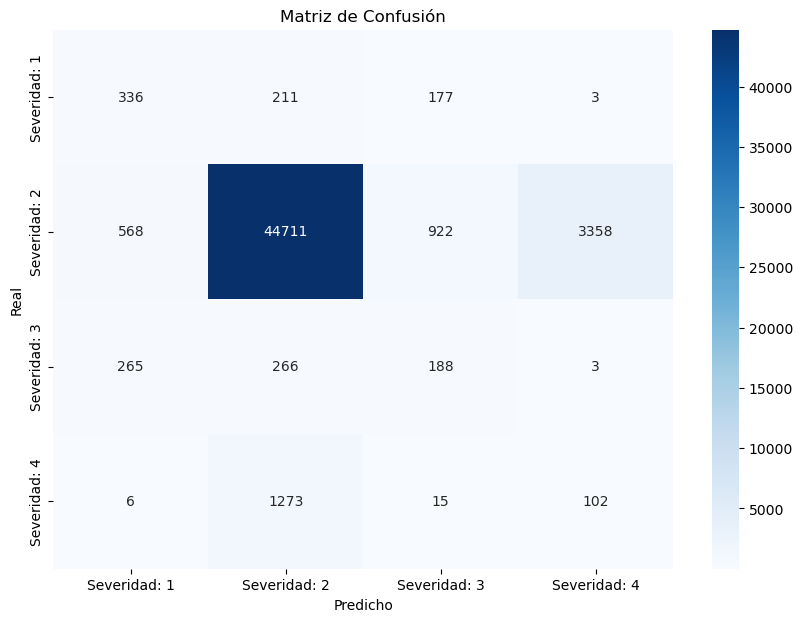

CSV generado exitosamente.


In [28]:
#-------------------------------------DECISION TREE CON FILTRO----------------------------
#-----------------------------------------------------------------------------------------

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Cargar el dataset
df = pd.read_csv("TFM_Limpio 1.csv")

# Convertir la columna Severity a valores numéricos de 0 a 3
severity_mapping = {1: 0, 2: 1, 3: 2, 4: 3}
df['Severity'] = df['Severity'].map(severity_mapping)

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes, año, día y hora
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# Dividir conjunto de entrenamiento (hasta agosto de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()

# Dividir conjunto de prueba en características y variable objetivo
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar el clasificador Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Predecir la severidad de los accidentes de agosto de 2022 a enero de 2023
predictions = model.predict(X_test_scaled)

# Calcular el score del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3])
print("Confusion Matrix:")
print(conf_matrix)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Agregar predicciones al conjunto de prueba
test_data.loc[:, 'Predicted_Severity'] = predictions + 1

# Seleccionar columnas necesarias para el nuevo DataFrame
columns = ['State', 'Hour', 'Day', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)', 'Predicted_Severity']

# Crear un nuevo DataFrame con las columnas seleccionadas
result_df = test_data[columns]

# Guardar el DataFrame en un archivo CSV
result_df.to_csv("predicted_severity_aug2022_jan2023.csv", index=False)

print("CSV generado exitosamente.")


Mejores parámetros encontrados por GridSearchCV:
{'max_depth': 30, 'n_estimators': 200}
Modelo: RandomForestRegressor
Mean Squared Error: 24.264970530073935
R^2 Score: 0.1891408090900355


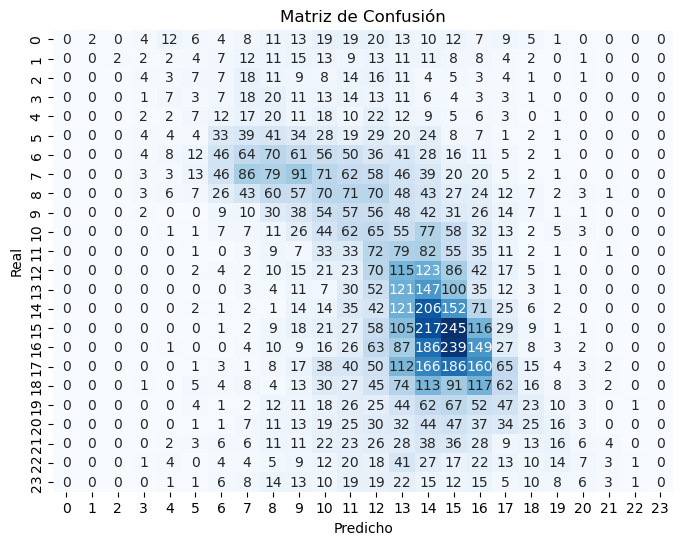

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Carga de datos
df = pd.read_csv('predicted_severity_aug2022_jan2023.csv')

# Paso 2: Preprocesamiento de datos
# Asegúrate de que no hay valores nulos
df = df.dropna()

# Codificación de variables categóricas con LabelEncoder
label_encoders = {}
categorical_columns = ['State']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Paso 3: Preparación de datos
X = df.drop(columns=['Hour'])
y = df['Hour']

# Paso 4: División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 5: Entrenamiento del modelo RandomForestRegressor
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [ 200],
    'max_depth': [30]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Imprimir los mejores parámetros encontrados por GridSearchCV
print("Mejores parámetros encontrados por GridSearchCV:")
print(grid_search.best_params_)

# Paso 6: Predicción con el mejor modelo ajustado
y_pred = best_model.predict(X_test)

# Paso 7: Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Modelo: {best_model.__class__.__name__}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Paso 8: Añadir las predicciones al dataframe original
df['Predicted_Hour'] = best_model.predict(X)

# Paso 9: Revertir la codificación de las variables categóricas
for col, le in label_encoders.items():
    df[col] = le.inverse_transform(df[col])

# Paso 10: Guardar el dataframe con las predicciones
df.to_csv('dataset_con_predicciones.csv', index=False)

# Paso 11: Mostrar la matriz de confusión como un heatmap (adaptado para regresión)
# Convertimos las predicciones y valores reales a enteros para la matriz de confusión
y_pred_int = np.round(y_pred).astype(int)
y_test_int = y_test.astype(int)
cm = confusion_matrix(y_test_int, y_pred_int)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


In [33]:
import pandas as pd

# Cargar el dataframe con las predicciones
df = pd.read_csv('dataset_con_predicciones.csv')

# Redondear los valores de la columna Predicted_Hour y convertir a enteros
df['Predicted_Hour'] = df['Predicted_Hour'].round().astype(int)

# Cambiar el nombre de la columna Predicted_Severity a Severity
df.rename(columns={'Predicted_Severity': 'Severity'}, inplace=True)

# Guardar el dataframe actualizado
df.to_csv('dataset_con_predicciones_redondeado.csv', index=False)


In [34]:
import pandas as pd

# Cargar el dataset desde el archivo CSV
df = pd.read_csv("dataset_con_predicciones_redondeado.csv")

# Filtrar por cada nivel de severidad y contar los casos por estado, mes y año
severity_1 = df[df['Severity'] == 1].groupby(['State', 'Month', 'Year']).size().reset_index(name='Severity 1')
severity_2 = df[df['Severity'] == 2].groupby(['State', 'Month', 'Year']).size().reset_index(name='Severity 2')
severity_3 = df[df['Severity'] == 3].groupby(['State', 'Month', 'Year']).size().reset_index(name='Severity 3')
severity_4 = df[df['Severity'] == 4].groupby(['State', 'Month', 'Year']).size().reset_index(name='Severity 4')

# Fusionar los recuentos en un solo DataFrame
result_df = severity_1.merge(severity_2, on=['State', 'Month', 'Year'], how='outer') \
                    .merge(severity_3, on=['State', 'Month', 'Year'], how='outer') \
                    .merge(severity_4, on=['State', 'Month', 'Year'], how='outer')

# Llenar valores NaN con 0
result_df = result_df.fillna(0)

result_df['Severity 1']=result_df['Severity 1'].astype(int)
result_df['Severity 2']=result_df['Severity 2'].astype(int)
result_df['Severity 3']=result_df['Severity 3'].astype(int)
result_df['Severity 4']=result_df['Severity 4'].astype(int)

# Calcular el total
result_df['Total'] = result_df['Severity 1'] + result_df['Severity 2'] + result_df['Severity 3'] + result_df['Severity 4']

# Reordenar las columnas
columnas_reordenadas = ['State', 'Month', 'Year', 'Severity 1', 'Severity 2', 'Severity 3', 'Severity 4', 'Total']
result_df = result_df[columnas_reordenadas]

print(result_df)
result_df.to_csv("accidentes_por_estado.csv",index=False)

    State  Month  Year  Severity 1  Severity 2  Severity 3  Severity 4  Total
0      AL      8  2022          16          96          16           0    128
1      AZ      8  2022           5         212           6           0    223
2      AZ      9  2022           1         144           2           0    147
3      CA      8  2022          62        1981          74           5   2122
4      CA      9  2022          18        1878          13           5   1914
..    ...    ...   ...         ...         ...         ...         ...    ...
269    WY      9  2022           0           3           0           0      3
270    WY     10  2022           0           2           0           0      2
271    WY     11  2022           0          19           0           0     19
272    WY     12  2022           0          20           0           0     20
273    ME      9  2022           0           0           1           0      1

[274 rows x 8 columns]


In [35]:
df = pd.read_csv("dataset_con_predicciones_redondeado.csv")
df

,State,Hour,Day,Month,Year,Wind_Speed(km/h),Temperature(C),Precipitation(mm),Severity,Predicted_Hour
0,VA,23,3,12,2022,8.04,7.22,0.00,2,19
1,CA,13,20,8,2022,20.92,20.00,0.00,2,14
2,TX,13,12,10,2022,11.26,32.78,0.00,2,14
3,KS,18,10,8,2022,11.26,30.00,0.00,2,17
4,LA,20,10,11,2022,8.04,17.22,0.00,2,18
...,...,...,...,...,...,...,...,...,...,...
52399,CA,18,28,1,2023,0.00,13.89,0.00,2,16
52400,NY,18,13,10,2022,25.74,19.44,2.03,2,15
52401,CA,13,22,12,2022,4.83,20.00,0.00,2,13
52402,OH,15,12,11,2022,11.26,1.11,0.00,2,15


In [36]:
import pandas as pd

# Calcular la diferencia absoluta entre Predicted_Hour y Hour
df['Difference'] = (df['Predicted_Hour'] - df['Hour']).abs()

# Calcular el desfase medio
mean_desfase = df['Difference'].mean()

# Convertir el desfase medio en horas, minutos y segundos
hours = int(mean_desfase)
minutes = int((mean_desfase - hours) * 60)
seconds = int(((mean_desfase - hours) * 60 - minutes) * 60)

print(f"El desfase medio es: {hours} horas, {minutes} minutos, y {seconds} segundos")

El desfase medio es: 1 horas, 52 minutos, y 51 segundos


#### DECISION TREE CON FILTRO

Accuracy: 0.865143882146401
Confusion Matrix:
[[  336   211   177     3]
 [  568 44711   922  3358]
 [  265   266   188     3]
 [    6  1273    15   102]]


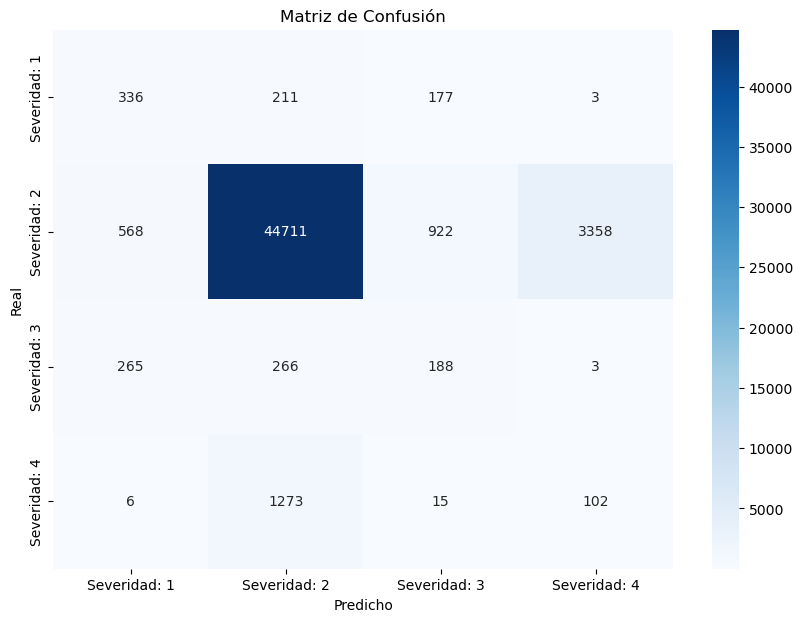

In [1]:
#-------------------------------------DECISION TREE CON FILTRO----------------------------
#-----------------------------------------------------------------------------------------


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Cargar el dataset
df = pd.read_csv("TFM_Limpio 1.csv")

# Convertir la columna Severity a valores numéricos de 0 a 3
severity_mapping = {1: 0, 2: 1, 3: 2, 4: 3}
df['Severity'] = df['Severity'].map(severity_mapping)

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes, año, día y hora
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# Dividir conjunto de entrenamiento (hasta agosto de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()

# Dividir conjunto de prueba en características y variable objetivo
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar el clasificador Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Predecir la severidad de los accidentes de agosto de 2022 a enero de 2023
predictions = model.predict(X_test_scaled)

# Calcular el score del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3])
print("Confusion Matrix:")
print(conf_matrix)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Agregar predicciones al conjunto de prueba
test_data.loc[:, 'Predicted_Severity'] = predictions + 1

# Seleccionar columnas necesarias para el nuevo DataFrame
columns = ['State', 'Hour', 'Day', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)', 'Predicted_Severity']

# Crear un nuevo DataFrame con las columnas seleccionadas
result_df = test_data[columns]

# Guardar el DataFrame en un archivo CSV
# result_df.to_csv("predicted_severity_aug2022_jan2023.csv", index=False)

# print("CSV generado exitosamente.")


Accuracy: 0.9466834592779177
Confusion Matrix:
[[    0   381   346     0]
 [    0 49220   338     1]
 [    0   332   390     0]
 [    0  1396     0     0]]


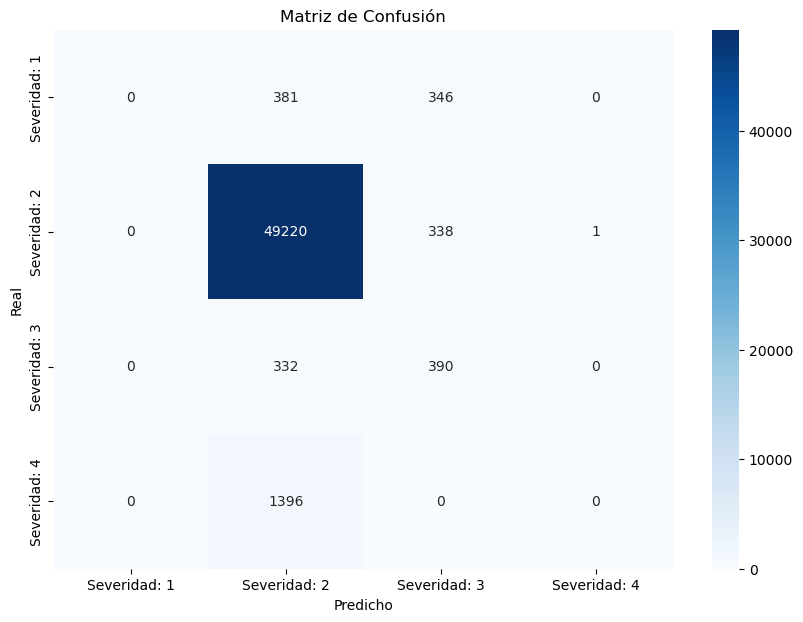

In [2]:
#-------------------------------------FILTRO XGBOOST SIN SMOTE---------------------
#----------------------------------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Cargar el dataset
df = pd.read_csv("TFM_Limpio 1.csv")

# Convertir la columna Severity a valores numéricos de 0 a 3
severity_mapping = {1: 0, 2: 1, 3: 2, 4: 3}
df['Severity'] = df['Severity'].map(severity_mapping)

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes, año, día y hora
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# Dividir conjunto de entrenamiento (hasta agosto de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()

# Dividir conjunto de prueba en características y variable objetivo
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar el clasificador XGBoost
model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    random_state=42,
    eval_metric='mlogloss'
)

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Predecir la severidad de los accidentes de agosto de 2022 a enero de 2023
predictions = model.predict(X_test_scaled)

# Calcular el score del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3])
print("Confusion Matrix:")
print(conf_matrix)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Agregar predicciones al conjunto de prueba
test_data.loc[:, 'Predicted_Severity'] = predictions + 1

# Seleccionar columnas necesarias para el nuevo DataFrame
columns = ['State', 'Hour', 'Day', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)', 'Predicted_Severity']

# Crear un nuevo DataFrame con las columnas seleccionadas
result_df = test_data[columns]

# Guardar el DataFrame en un archivo CSV
# result_df.to_csv("predicted_severity_aug2022_jan2023.csv", index=False)

# print("CSV generado exitosamente.")


Accuracy: 0.9182314327150599
Confusion Matrix:
[[    0    36   690     1]
 [    0 47411   617  1531]
 [    0   108   614     0]
 [    0  1302     0    94]]


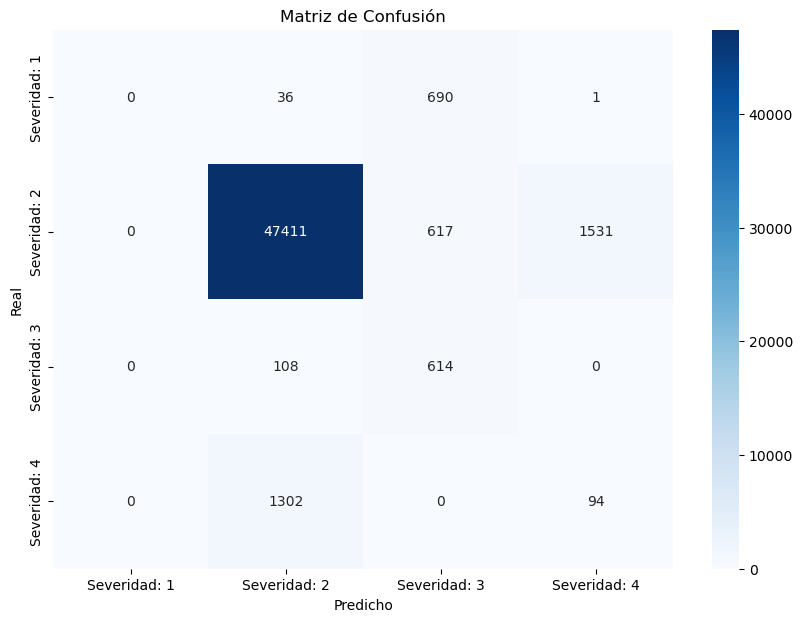

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Cargar el dataset
df = pd.read_csv("TFM_Limpio 1.csv")

# Convertir la columna Severity a valores numéricos de 0 a 3
severity_mapping = {1: 0, 2: 1, 3: 2, 4: 3}
df['Severity'] = df['Severity'].map(severity_mapping)

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes, año, día y hora
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# Dividir conjunto de entrenamiento (hasta agosto de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()

# Dividir conjunto de prueba en características y variable objetivo
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Inicializar el clasificador XGBoost con logloss para mejor manejo de clases desequilibradas
model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=4,d
    random_state=42,
    eval_metric='mlogloss'
)

# Entrenar el modelo
model.fit(X_train_scaled, y_train_resampled)

# Predecir la severidad de los accidentes de agosto de 2022 a enero de 2023
predictions = model.predict(X_test_scaled)

# Calcular el score del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3])
print("Confusion Matrix:")
print(conf_matrix)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Agregar predicciones al conjunto de prueba
test_data.loc[:, 'Predicted_Severity'] = predictions + 1

# Seleccionar columnas necesarias para el nuevo DataFrame
columns = ['State', 'Hour', 'Day', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)', 'Predicted_Severity']

# Crear un nuevo DataFrame con las columnas seleccionadas
result_df = test_data[columns]

# Guardar el DataFrame en un archivo CSV
result_df.to_csv("predicted_severity_aug2022_jan2023.csv", index=False)

# print("CSV generado exitosamente.")


Accuracy: 0.9238798564995039
Confusion Matrix:
[[    9   428   289     1]
 [   66 48066   347  1080]
 [    7   432   281     2]
 [    2  1331     4    59]]


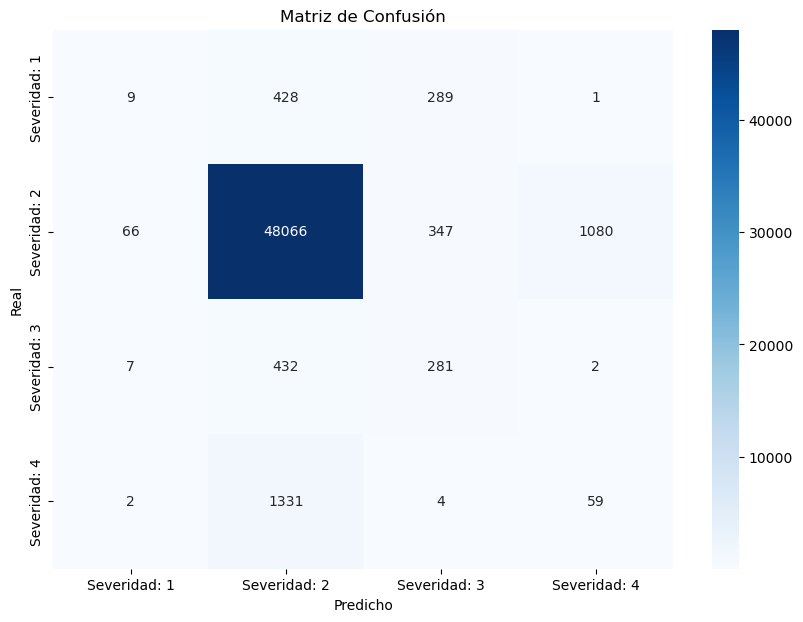

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Cargar el dataset
df = pd.read_csv("TFM_Limpio 1.csv")

# Convertir la columna Severity a valores numéricos de 0 a 3
severity_mapping = {1: 0, 2: 1, 3: 2, 4: 3}
df['Severity'] = df['Severity'].map(severity_mapping)

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes, año, día y hora
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# Dividir conjunto de entrenamiento (hasta agosto de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()

# Dividir conjunto de prueba en características y variable objetivo
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Inicializar el clasificador RandomForest
model = RandomForestClassifier(random_state=42, n_estimators=100)

# Entrenar el modelo
model.fit(X_train_scaled, y_train_resampled)

# Predecir la severidad de los accidentes de agosto de 2022 a enero de 2023
predictions = model.predict(X_test_scaled)

# Calcular el score del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3])
print("Confusion Matrix:")
print(conf_matrix)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Agregar predicciones al conjunto de prueba
test_data.loc[:, 'Predicted_Severity'] = predictions + 1

# Seleccionar columnas necesarias para el nuevo DataFrame
columns = ['State', 'Hour', 'Day', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)', 'Predicted_Severity']

# Crear un nuevo DataFrame con las columnas seleccionadas
result_df = test_data[columns]

# Guardar el DataFrame en un archivo CSV
# result_df.to_csv("predicted_severity_aug2022_jan2023.csv", index=False)

# print("CSV generado exitosamente.")


----------------------------------------REGRESIÓN LINEAL---------------------------------------
mse:  0.13526414787474422
mae:  0.1327482277109994
rmse:  0.3677827454826344
medae:  0.04304045053071115
Matriz de Confusión:
[[    0   727     0     0]
 [    0 49427   128     4]
 [    0   719     3     0]
 [    0  1390     6     0]]


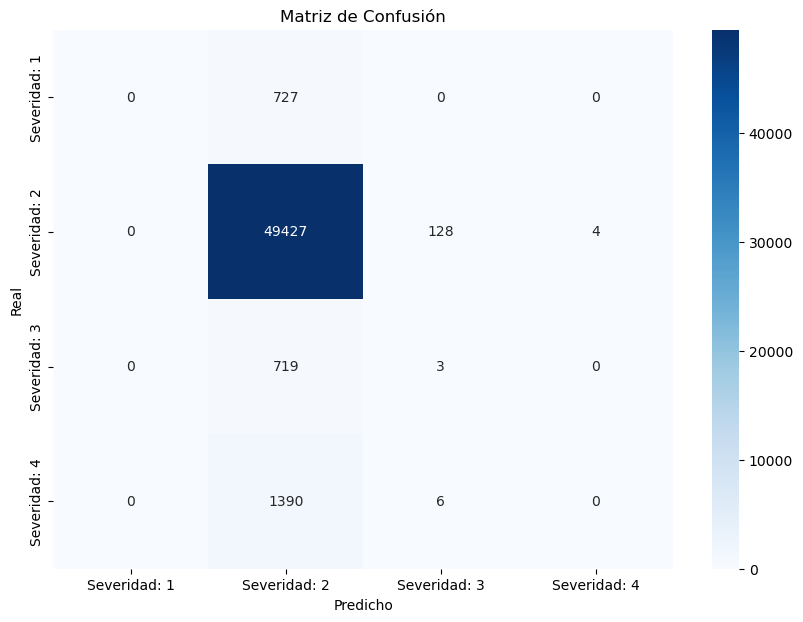

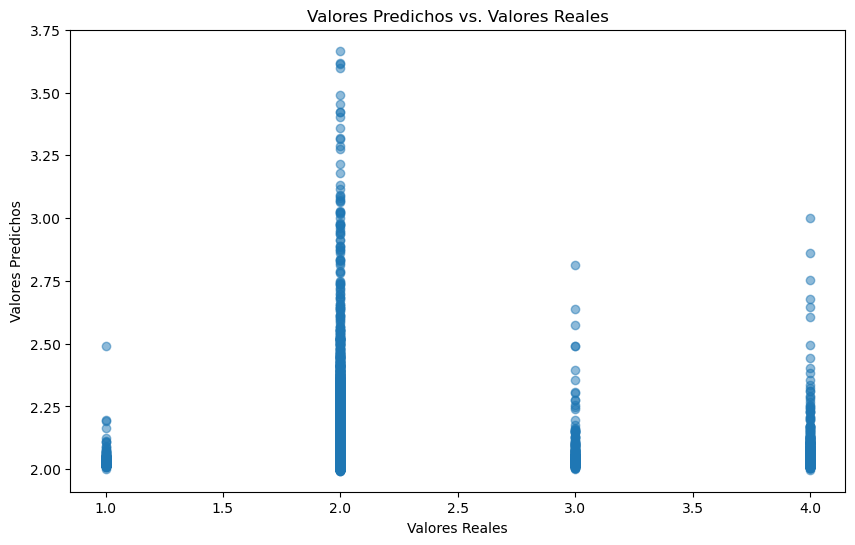

In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix

# Supongamos que 'data' es tu DataFrame
data= read_csv("TFM_limpio 1.csv")

# Convertir la columna de fechas a tipo datetime si no está en ese formato
data['Start_Time'] = pd.to_datetime(data['Start_Time'])

# Agregar columnas de mes, año, día y hora
data['Month'] = data['Start_Time'].dt.month
data['Year'] = data['Start_Time'].dt.year
data['Day'] = data['Start_Time'].dt.day
data['Hour'] = data['Start_Time'].dt.hour

# División del dataset en conjunto de entrenamiento (hasta julio de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = data[data['Start_Time'] < '2022-08-01']
test_data = data[(data['Start_Time'] >= '2022-08-01') & (data['Start_Time'] <= '2023-01-31')].copy()

# Extracción de características y etiquetas
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

X_train = train_data[features]
Y_train = train_data[target]
X_validation = test_data[features]
Y_validation = test_data[target]

# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)




# Evaluación del modelo
mse = mean_squared_error(Y_validation, predictions)
mae = mean_absolute_error(Y_validation, predictions)
rmse = np.sqrt(mean_squared_error(Y_validation, predictions))
medae = np.median(np.abs(Y_validation - predictions))

print("----------------------------------------REGRESIÓN LINEAL---------------------------------------")
print("mse: ", mse)
print("mae: ", mae)
print("rmse: ", rmse)
print("medae: ", medae)

# Redondeo de las predicciones para obtener categorías discretas
predictions_rounded = np.round(predictions)

# Cálculo de la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions_rounded)

print("Matriz de Confusión:")
print(conf_matrix)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Scatter plot de valores predichos vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(Y_validation, predictions, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Predichos vs. Valores Reales')
plt.show()


MSE:  0.15981888421295898
MAE:  0.1883848884632679
RMSE:  0.3997735411616919
MedAE:  0.06999999999999984


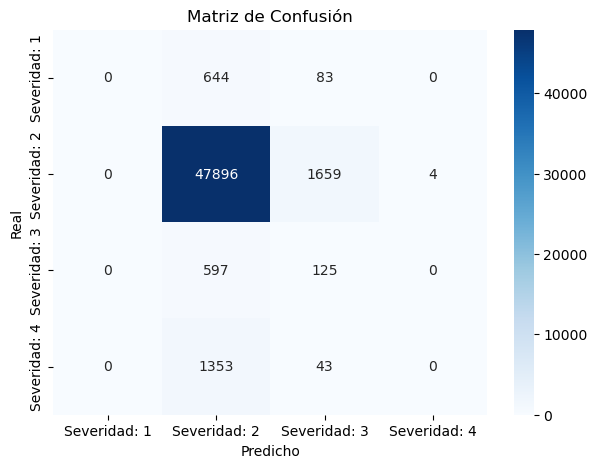

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Supongamos que 'data' es tu DataFrame
data = pd.read_csv("TFM_Limpio 1.csv")  # Asegúrate de cargar tu DataFrame aquí

# Convertir la columna de fechas a tipo datetime si no está en ese formato
data['Start_Time'] = pd.to_datetime(data['Start_Time'])

# Agregar columnas de mes, año, día y hora
data['Month'] = data['Start_Time'].dt.month
data['Year'] = data['Start_Time'].dt.year
data['Day'] = data['Start_Time'].dt.day
data['Hour'] = data['Start_Time'].dt.hour

# División del dataset en conjunto de entrenamiento (hasta julio de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = data[data['Start_Time'] < '2022-08-01']
test_data = data[(data['Start_Time'] >= '2022-08-01') & (data['Start_Time'] <= '2023-01-31')].copy()

# Extracción de características y etiquetas
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

X_train = train_data[features]
Y_train = train_data[target]
X_validation = test_data[features]
Y_validation = test_data[target]

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)

# Crear y entrenar el modelo de Random Forest Regressor
model = RandomForestRegressor(random_state=1)
model.fit(X_train, Y_train)

# Hacer predicciones
predictions = model.predict(X_validation)

# Evaluar el modelo
mse = mean_squared_error(Y_validation, predictions)
mae = mean_absolute_error(Y_validation, predictions)
rmse = np.sqrt(mse)
medae = np.median(np.abs(Y_validation - predictions))

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("MedAE: ", medae)

# Redondeo de las predicciones para obtener categorías discretas
predictions_rounded = np.round(predictions)

# Cálculo de la matriz de confusión
cm = confusion_matrix(Y_validation, predictions_rounded, labels=[1, 2, 3, 4])

# Graficar matriz de confusión con etiquetas adecuadas
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


[[    0     0     0     0]
 [    0   170   326   230]
 [    0   131 49113   244]
 [    0   128   356   238]]
              precision    recall  f1-score   support

           1       0.40      0.23      0.29       727
           2       0.96      0.99      0.97     49559
           3       0.33      0.33      0.33       722
           4       0.03      0.00      0.00      1396

    accuracy                           0.95     52404
   macro avg       0.43      0.39      0.40     52404
weighted avg       0.92      0.95      0.93     52404


Accuracy: 0.945023280665598


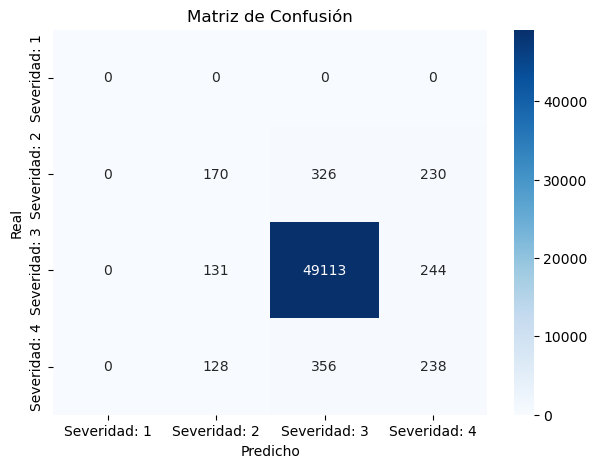

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Supongamos que 'data' es tu DataFrame
data = pd.read_csv("TFM_Limpio 1.csv")  # Asegúrate de cargar tu DataFrame aquí

# Convertir la columna de fechas a tipo datetime si no está en ese formato
data['Start_Time'] = pd.to_datetime(data['Start_Time'])

# Agregar columnas de mes, año, día y hora
data['Month'] = data['Start_Time'].dt.month
data['Year'] = data['Start_Time'].dt.year
data['Day'] = data['Start_Time'].dt.day
data['Hour'] = data['Start_Time'].dt.hour

# División del dataset en conjunto de entrenamiento (hasta julio de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = data[data['Start_Time'] < '2022-08-01']
test_data = data[(data['Start_Time'] >= '2022-08-01') & (data['Start_Time'] <= '2023-01-31')].copy()

# Extracción de características y etiquetas
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

X_train = train_data[features]
Y_train = train_data[target]
X_validation = test_data[features]
Y_validation = test_data[target]

# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)

# Entrenar el modelo RandomForest
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# Realizar predicciones
predictions = model.predict(X_validation)

# Imprimir matriz de confusión
cm = confusion_matrix(Y_validation, predictions, labels=[0, 1, 2, 3])
print(cm)

# Imprimir informe de clasificación
print(classification_report(Y_validation, predictions))
print("\nAccuracy:", accuracy_score(Y_validation, predictions))

# Graficar matriz de confusión con etiquetas adecuadas
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


Accuracy: 0.9238798564995039
Confusion Matrix:
[[    9   428   289     1]
 [   66 48066   347  1080]
 [    7   432   281     2]
 [    2  1331     4    59]]


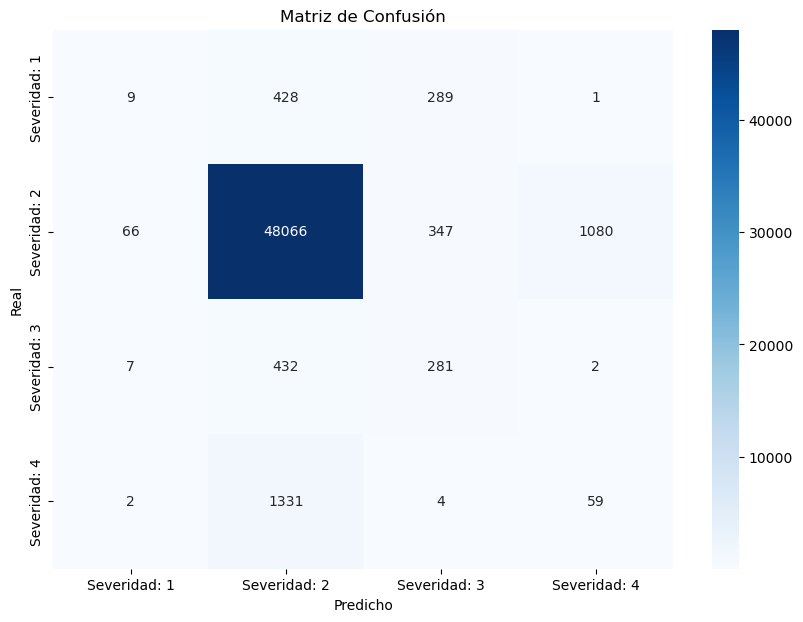

CSV generado exitosamente.


In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Cargar el dataset
df = pd.read_csv("TFM_Limpio 1.csv")

# Convertir la columna Severity a valores numéricos de 0 a 3
severity_mapping = {1: 0, 2: 1, 3: 2, 4: 3}
df['Severity'] = df['Severity'].map(severity_mapping)

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes, año, día y hora
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# Dividir conjunto de entrenamiento (hasta agosto de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()

# Dividir conjunto de prueba en características y variable objetivo
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Inicializar el clasificador RandomForest
model = RandomForestClassifier(random_state=42, n_estimators=100)

# Entrenar el modelo
model.fit(X_train_scaled, y_train_resampled)

# Predecir la severidad de los accidentes de agosto de 2022 a enero de 2023
predictions = model.predict(X_test_scaled)

# Calcular el score del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3])
print("Confusion Matrix:")
print(conf_matrix)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Agregar predicciones al conjunto de prueba
test_data.loc[:, 'Predicted_Severity'] = predictions + 1

# Seleccionar columnas necesarias para el nuevo DataFrame
columns = ['State', 'Hour', 'Day', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)', 'Predicted_Severity']

# Crear un nuevo DataFrame con las columnas seleccionadas
result_df = test_data[columns]

# Guardar el DataFrame en un archivo CSV
# result_df.to_csv("predicted_severity_aug2022_jan2023.csv", index=False)

print("CSV generado exitosamente.")


Accuracy: 0.8675482787573467
Confusion Matrix:
[[    3   469   252     3]
 [  188 45106  1349  2916]
 [    2   464   252     4]
 [    8  1265    21   102]]


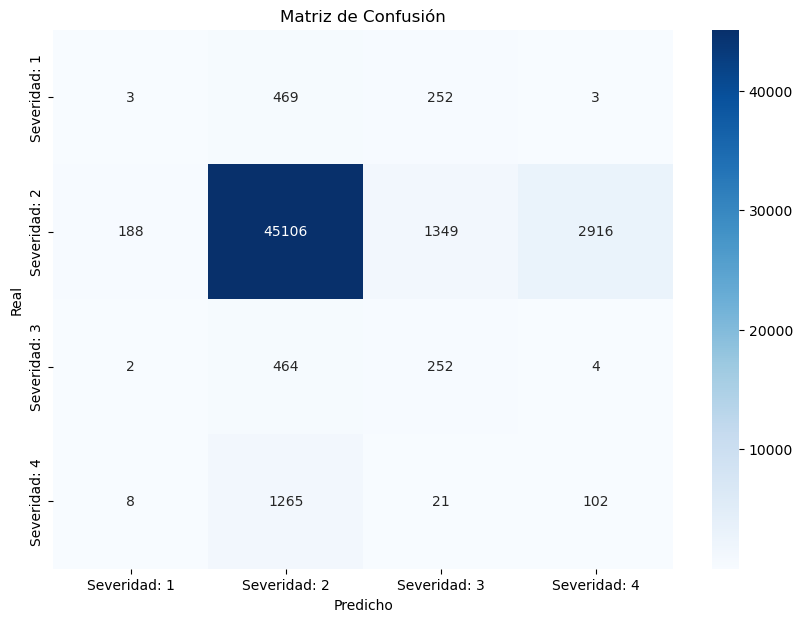

CSV generado exitosamente.


In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

# Cargar el dataset
df = pd.read_csv("TFM_Limpio 1.csv")

# Convertir la columna Severity a valores numéricos de 0 a 3
severity_mapping = {1: 0, 2: 1, 3: 2, 4: 3}
df['Severity'] = df['Severity'].map(severity_mapping)

# Convertir la columna de fechas a tipo datetime si no está en ese formato
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Agregar columnas de mes, año, día y hora
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

# Seleccionar características y variable objetivo
features = ['Distance(km)', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)']
target = 'Severity'

# Dividir conjunto de entrenamiento (hasta agosto de 2022) y conjunto de prueba (de agosto de 2022 a enero de 2023)
train_data = df[df['Start_Time'] < '2022-08-01']
test_data = df[(df['Start_Time'] >= '2022-08-01') & (df['Start_Time'] <= '2023-01-31')].copy()

# Dividir conjunto de prueba en características y variable objetivo
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Inicializar el clasificador Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train_scaled, y_train_resampled)

# Predecir la severidad de los accidentes de agosto de 2022 a enero de 2023
predictions = model.predict(X_test_scaled)

# Calcular el score del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3])
print("Confusion Matrix:")
print(conf_matrix)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'],
            yticklabels=['Severidad: 1', 'Severidad: 2', 'Severidad: 3', 'Severidad: 4'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Agregar predicciones al conjunto de prueba
test_data.loc[:, 'Predicted_Severity'] = predictions + 1

# Seleccionar columnas necesarias para el nuevo DataFrame
columns = ['State', 'Hour', 'Day', 'Month', 'Year', 'Wind_Speed(km/h)', 'Temperature(C)', 'Precipitation(mm)', 'Predicted_Severity']

# Crear un nuevo DataFrame con las columnas seleccionadas
result_df = test_data[columns]

# Guardar el DataFrame en un archivo CSV
# result_df.to_csv("predicted_severity_aug2022_jan2023_decision_tree.csv", index=False)

print("CSV generado exitosamente.")

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Paso 1: Carga de datos
df = pd.read_csv('predicted_severity_aug2022_jan2023.csv')

# Paso 2: Preprocesamiento de datos
# Asegúrate de que no hay valores nulos
df = df.dropna()

# Codificación de variables categóricas con LabelEncoder
label_encoders = {}
categorical_columns = ['State']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Paso 3: Preparación de datos
X = df.drop(columns=['Hour'])
y = df['Hour']

# Paso 4: División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos a evaluar con sus respectivos parámetros para GridSearchCV
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Random Forest Regressor': (RandomForestRegressor(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    }),
    'SVR': (SVR(), {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10]
    })
}

# Diccionarios para almacenar las métricas del mejor modelo
best_model = None
best_metrics = {}
best_score = float('inf')  # Inicializamos con un valor muy alto para encontrar el mínimo

# Bucle sobre los modelos
for model_name, (model, param_grid) in models.items():
    print(f"Entrenando modelo: {model_name}")
    
    # Configuración de GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    # Mejor modelo encontrado por GridSearchCV
    best_estimator = grid_search.best_estimator_
    
    # Predicción con el mejor modelo
    y_pred = best_estimator.predict(X_test)
    
    # Calculando métricas
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    medae = median_absolute_error(y_test, y_pred)
    
    # Almacenando métricas del mejor modelo
    best_metrics[model_name] = {
        'Best Model': best_estimator,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'MEDAE': medae
    }
    
    # Actualizando el mejor modelo basado en el menor MSE
    if mse < best_score:
        best_score = mse
        best_model = best_estimator
    
    # Imprimiendo métricas
    print(f'Modelo: {model_name}')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Median Absolute Error: {medae}')
    print('')

# Paso 8: Añadir las predicciones del mejor modelo al dataframe original
if best_model is not None:
    best_pred = best_model.predict(X)
    df['Predicted_Hour'] = best_pred

# Paso 9: Revertir la codificación de las variables categóricas
for col, le in label_encoders.items():
    df[col] = le.inverse_transform(df[col])

# Paso 10: Guardar el dataframe con las predicciones del mejor modelo
df.to_csv('dataset_con_prediccion_mejor_modelo.csv', index=False)

# Imprimir el mejor modelo encontrado por GridSearchCV
print("Mejor modelo encontrado por GridSearchCV:")
print(best_model)


Entrenando modelo: Linear Regression
Modelo: Linear Regression
Mean Squared Error: 28.18372898553701
Mean Absolute Error: 4.360870160224736
Root Mean Squared Error: 5.308834993248237
Median Absolute Error: 3.8976522170105454

Entrenando modelo: Random Forest Regressor
Modelo: Random Forest Regressor
Mean Squared Error: 23.92622514199743
Mean Absolute Error: 3.676110525993096
Root Mean Squared Error: 4.891444075321462
Median Absolute Error: 2.7575883069265394

Entrenando modelo: SVR


KeyboardInterrupt: 